In [14]:
### IMPORTS ###

import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
import numpy as np
import pandas as pd


from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Activation, Dropout, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
tf.random.set_seed(2)

In [16]:
TRAIN_BASE_DIRECTORY = "./data/test/train"
TEST_BASE_DIRECTORY = "./data/test/test"


image_data_generator = ImageDataGenerator(validation_split=0.5)


TRAIN_IMAGE_SIZE = 32
TRAIN_BATCH_SIZE = 64

In [17]:
train_generator = image_data_generator.flow_from_directory(
    TRAIN_BASE_DIRECTORY,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=5)

validation_generator = image_data_generator.flow_from_directory(
    TEST_BASE_DIRECTORY,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=5)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [18]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))

#Fin obligatoire
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dense_3 (Dense)              (None, 16, 16, 64)        2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dense_4 (Dense)              (None, 8, 8, 128)        

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es_callback = EarlyStopping(monitor='val_loss', patience=5)

training = model.fit_generator(train_generator, epochs=50, callbacks=[es_callback], validation_data=validation_generator, shuffle=False)

Epoch 1/50
8/8 [==============================] - 1s 112ms/step - loss: 31.0764 - accuracy: 0.5240 - val_loss: 4.4610 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 1s 88ms/step - loss: 1.5944 - accuracy: 0.6200 - val_loss: 0.6111 - val_accuracy: 0.6000
Epoch 3/50
8/8 [==============================] - 1s 93ms/step - loss: 0.4832 - accuracy: 0.7700 - val_loss: 0.3119 - val_accuracy: 0.8700
Epoch 4/50
8/8 [==============================] - 1s 89ms/step - loss: 0.3459 - accuracy: 0.8360 - val_loss: 0.3725 - val_accuracy: 0.8300
Epoch 5/50
8/8 [==============================] - 1s 85ms/step - loss: 0.3207 - accuracy: 0.8580 - val_loss: 0.2369 - val_accuracy: 0.9000
Epoch 6/50
8/8 [==============================] - 1s 86ms/step - loss: 0.2533 - accuracy: 0.8940 - val_loss: 0.2736 - val_accuracy: 0.8900
Epoch 7/50
8/8 [==============================] - 1s 92ms/step - loss: 0.2565 - accuracy: 0.8920 - val_loss: 0.2269 - val_accuracy: 0.9300
Epoch 8/50
8/8 [=========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


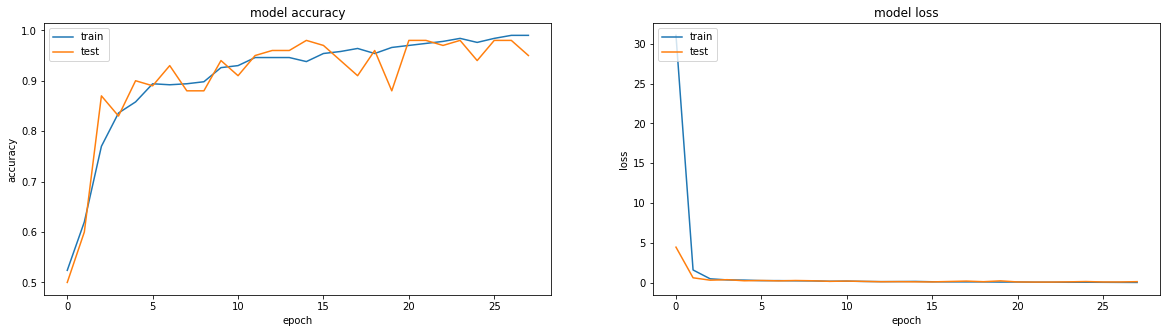

In [21]:

def print_model_history(history):
    '''
        print model training history
    '''
    # list all data in history
    print(history.history.keys())
    plt.figure(figsize=(20,5))

    plt.subplot(1,2,1)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.subplot(1,2,2)
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

print_model_history(training)

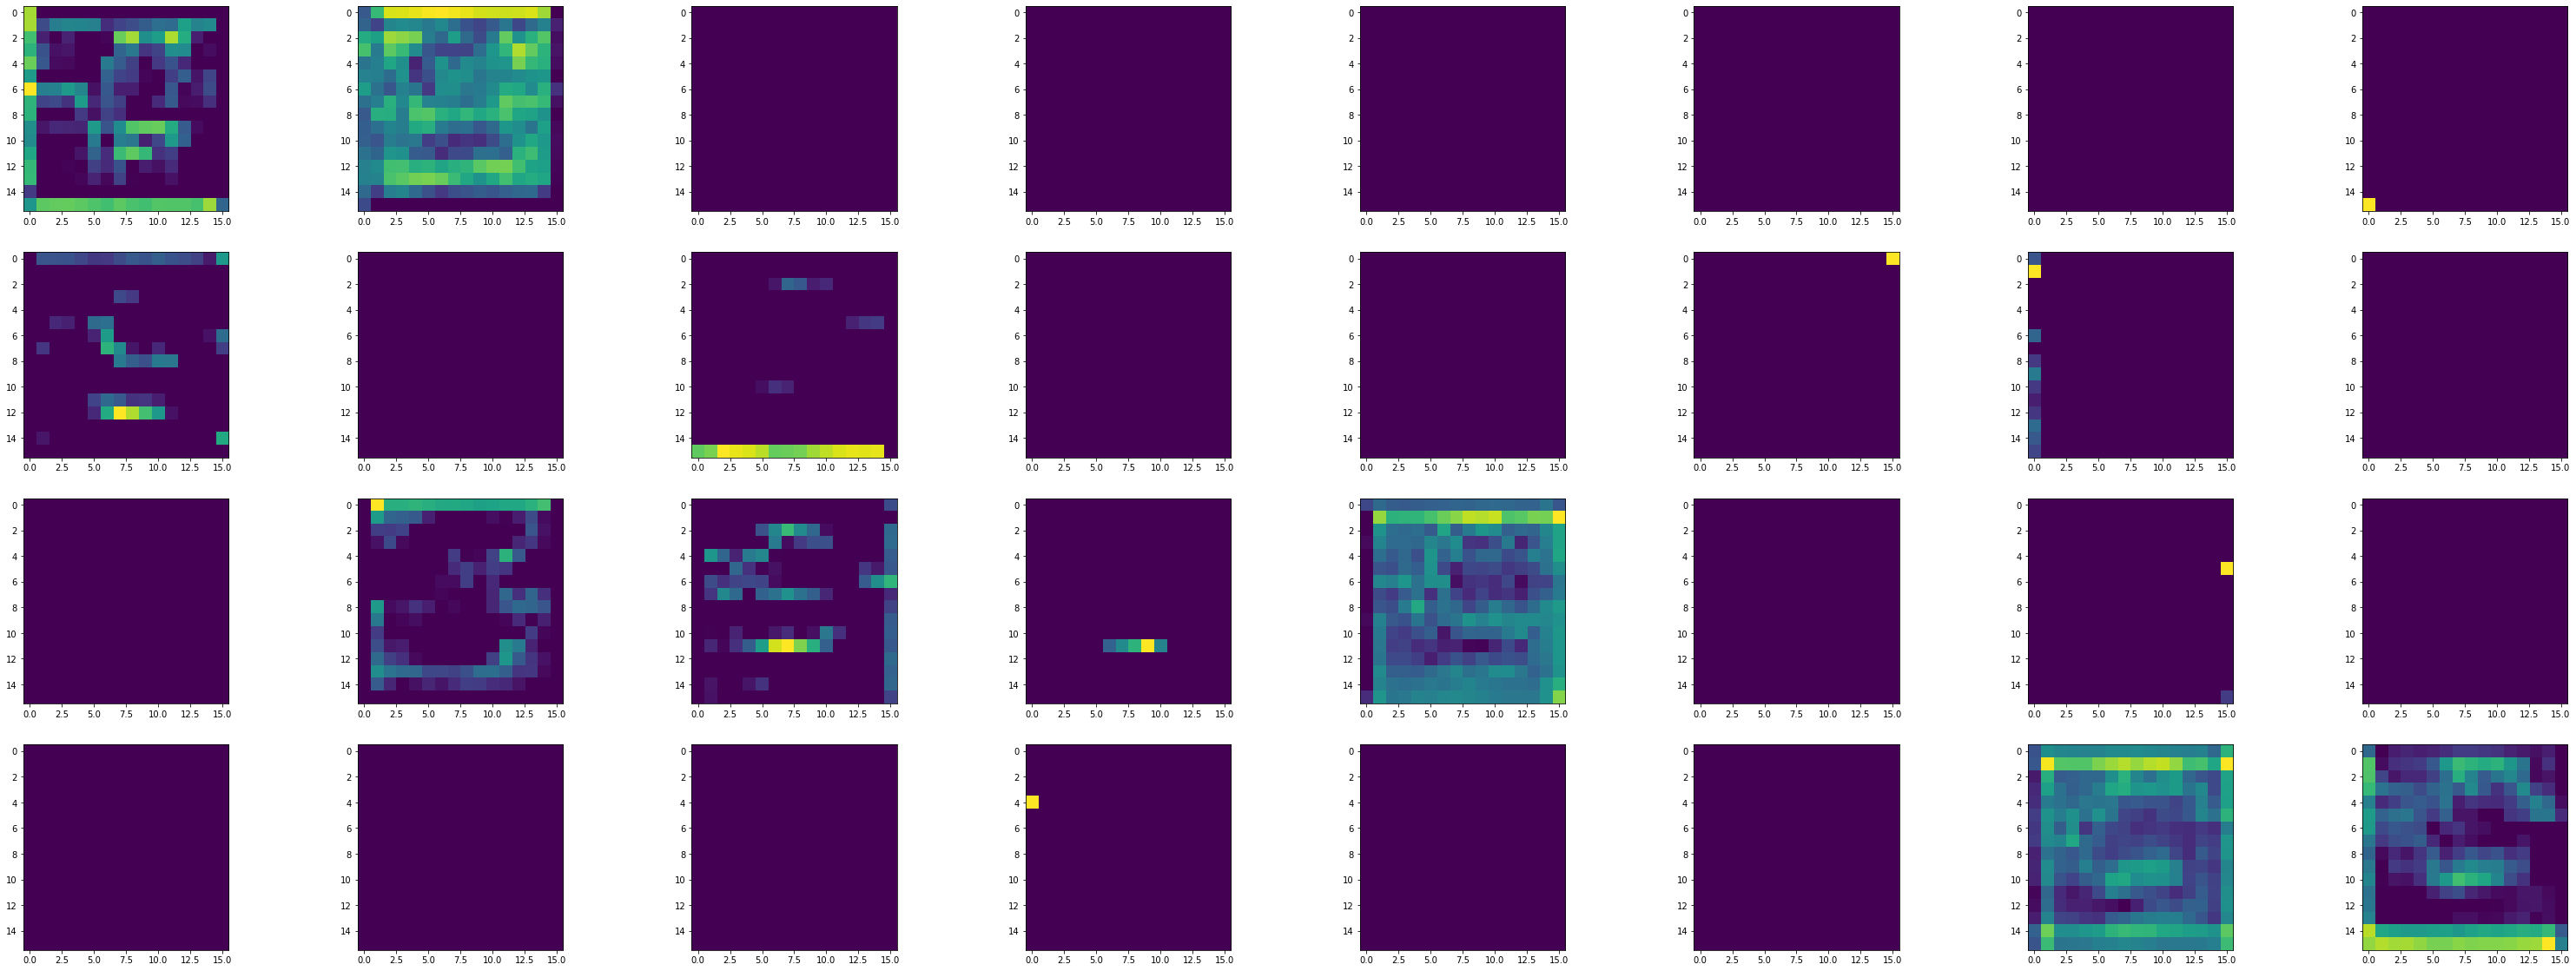

In [22]:
layer_outputs = [layer.output for layer in model.layers]

test_image = "./data/test/test/bus/0020.png"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

display_activation(activations, 8, 4, 4)

In [23]:
model.save('model.h5')

Cet objet est un(e) apple. probs=  91.7069673538208


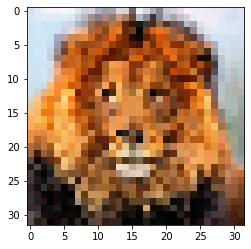

In [24]:
labels_array = os.listdir(TRAIN_BASE_DIRECTORY)

choix = r"./data/lion.png"
model = load_model('model.h5')

test_image = image.load_img(choix, target_size = (32, 32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

preds = model.predict_classes(test_image)
prob = model.predict_proba(test_image)

index = preds[0]
print(f'Cet objet est un(e) {labels_array[index]}.', 'probs= ', prob[0][index] * 100)

In [25]:
model.save_weights("./data/weights.h5")